# Om Mistry

## **How does Educational attainment relate to gun deaths in America and what other factors affect this relationship ?**

Sub-Questions to achieve the above goal:
- Is there a correlation between educational attainment and gun deaths rates in the United States after controlling for other demographic and contextual factors, such as age, gender, race, religion and gun ownership rates ? This could be done using regression analysis to examine the contribution of education while keeping the other factors constant.
- To what extent does the knowledge of gun safety or ownership meditate the relationship between gun deaths and education ? This could be monitored by using the "intent" column of the dataset.
- Are there differences in the relationship between education and gun deaths across different age groups, race, or geographical regions? We could explore whether the protective effects of education are stronger for younger or elder individuals for certain racial groups.


## EDA (Exploratory Data Analysis)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Understanding the Dataset 
raw_data = pd.read_csv("../data/raw/full_data.csv")

In [15]:
#Looking at the unique values of each variable in the dataset
raw_data.nunique(axis=0)

Unnamed: 0    100798
year               3
month             12
intent             4
police             2
sex                2
age              104
race               5
hispanic          39
place             10
education          4
dtype: int64

In [16]:
raw_data.describe()

,Unnamed: 0,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000


### Now we focus on cleaning our dataset to make it easier to work with. (Implementing Method chaining)

In [18]:
# We will start cleaning the dataset by removing redundant columns which are not used by us in the research.
data_cleaned = (raw_data.drop(['hispanic',"Unnamed: 0"],axis=1)
                .dropna(subset=['year','month','intent','police','sex','age','race','place','education'])
                .reset_index(drop=True)
)
data_cleaned

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
98010,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
98011,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
98012,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
98013,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


In [22]:
#Sub setting data with only relevant columns 
# Descriptive Statistics by Educational level
df1 = data_cleaned[['age','sex','race','education','intent']]
df1.groupby('education').agg({'intent':'count','age':['mean','std']})


intent        age           
              count       mean        std
education                                
BA+           12879  54.142480  16.704106
HS/GED        42258  44.170950  18.830056
Less than HS  21448  36.648685  20.977433
Some college  21430  44.468549  17.884657

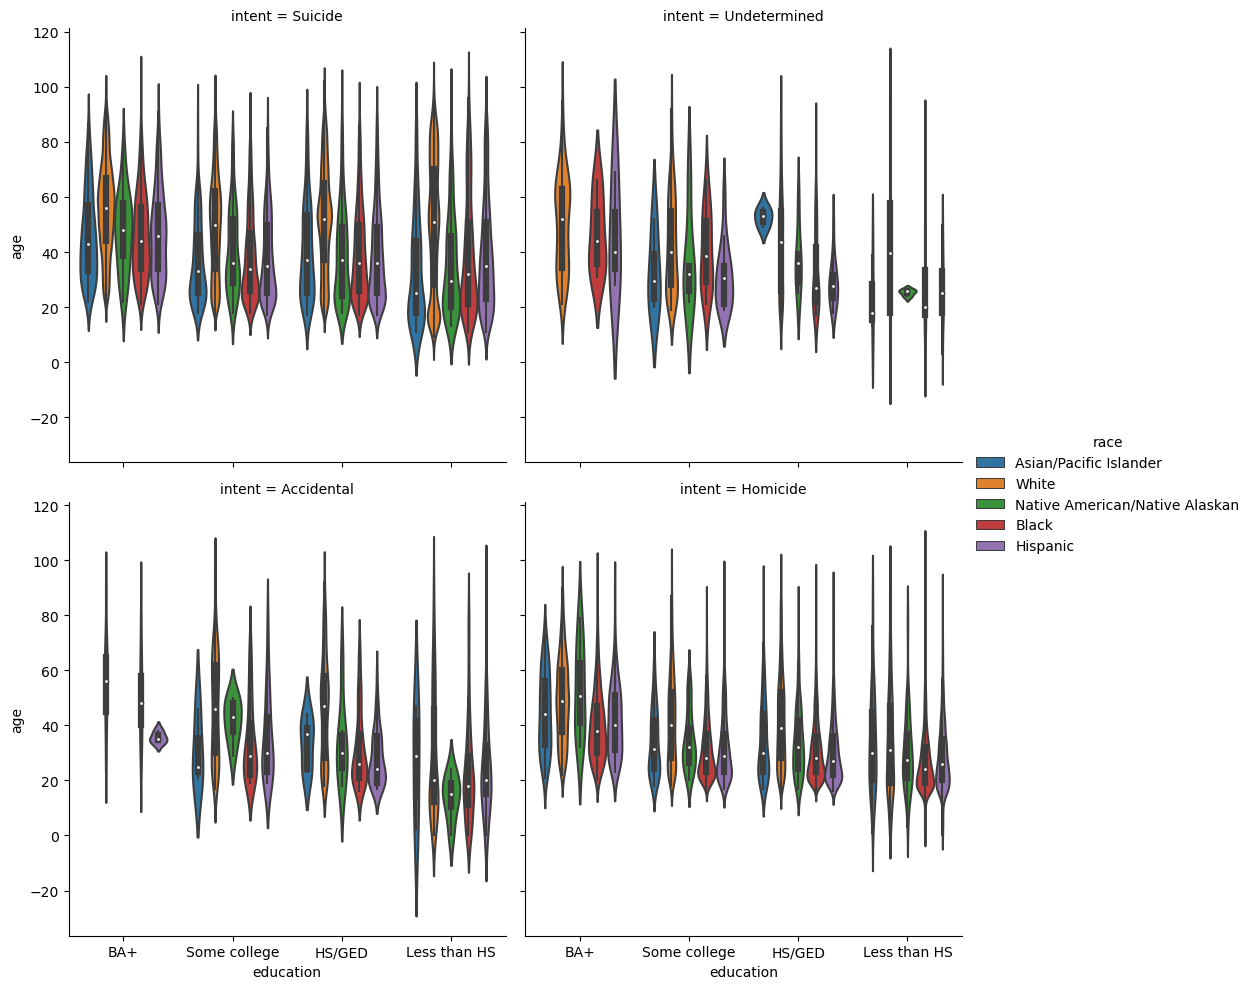

In [23]:
# Visualizing the relationship between education and gun deaths 
sns.catplot(data=df1, x='education', y='age',hue='race',col='intent',kind='violin',col_wrap=2)

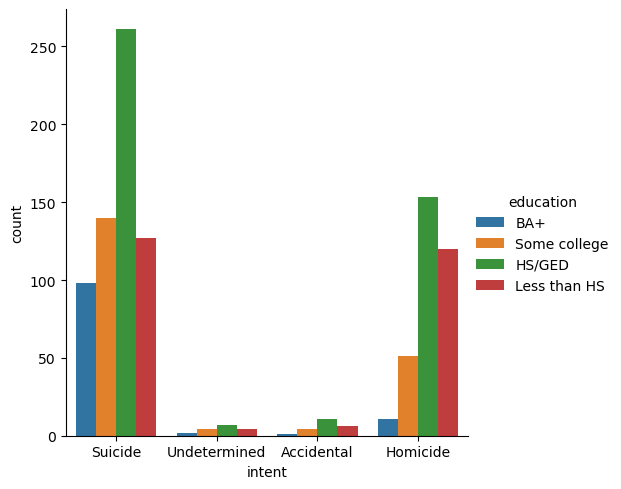

In [24]:
# Sub setting relevant columns from the main cleaned data set 
# Creating a new variable indicating the type of death
# Visualization the distribution of gun deaths by intent and education
(data_cleaned[['education', 'intent']]
 .iloc[:1000]
 .assign(death_type=lambda x: x['intent'].replace({
     'Accidental': 'Unintentional',
     'NA': 'other',
     'Undetermined': 'other'
 }).fillna('Homicide'))
 .pipe((sns.catplot, 'data'), x='intent', kind='count', hue='education')
)

[Text(0.5, 0, 'Education'), Text(0, 0.5, 'Age of Victim')]

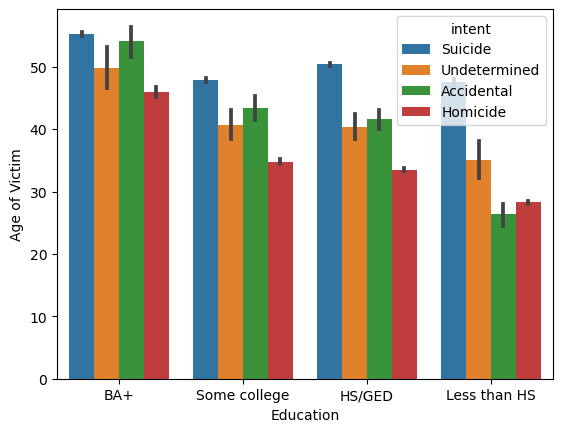

In [28]:
#Sub setting the data set again to work with variables that are relevant 
# Visualization
(data_cleaned[['age','race','sex','education','intent','place']]
.pipe((sns.barplot,'data'), x='education', y='age', hue='intent')
.set(xlabel='Education', ylabel='Age of Victim'))

[Text(0.5, 0, 'Place of Death')]

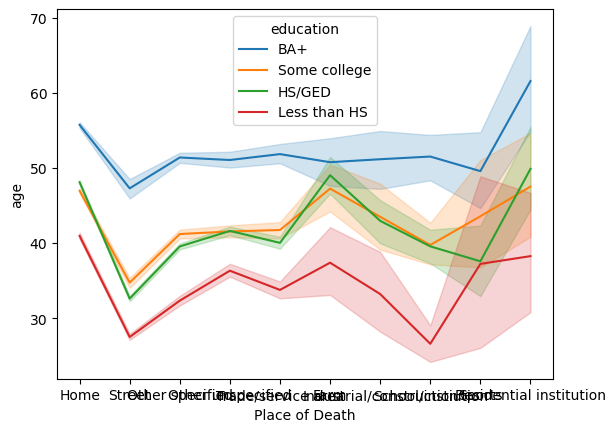

In [35]:
(data_cleaned
.pipe((sns.lineplot,'data'), x='place', y='age', hue='education')
.set(xlabel="Place of Death")
)

In [ ]:
#Loading the processed data into a csv file
data_cleaned.to_csv('../data/processed/processed.csv', index=False)

# Observations from the above EDA
- The descriptive statistics shows that individuals with lower levels of education tend to have a higher rates of gun deaths.
- The violin plots show that the relationship between education and gun deaths varies by race and intent. For example, for intentional deaths, the median age of victims decreases as education level increases, and this trend is more pronounced for White individuals than for other racial groups.
- The count plot distribution shows that most deaths are intentional (suicide or homicide) .
- The bar plot also gives an idea that the age of the victim gets lower with the amount of education they receive. For example, someone with an education less than HS is more likely to face gun violence of some kind (highly intentional) at a younger age than someone with a higher education.